<a href="https://colab.research.google.com/github/LinjingBi/ai_robotics_lab/blob/main/lab_week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
data = pd.read_csv("titanic.csv")

In [4]:
data.info()
target = data['Survived'].copy()
# target = data['Pclass'].copy()
feature = data[['Pclass', 'Sex', 'Age', 'Siblings_SpousesAboard', 'Parents_ChildrenAboard', 'Fare']].copy()
feature['Sex'] = feature['Sex'].astype('bool')
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                887 non-null    int64  
 1   Pclass                  887 non-null    int64  
 2   Name                    887 non-null    object 
 3   Sex                     887 non-null    object 
 4   Age                     887 non-null    float64
 5   Siblings_SpousesAboard  887 non-null    int64  
 6   Parents_ChildrenAboard  887 non-null    int64  
 7   Fare                    887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pclass                  887 non-null    int64  
 1   Sex                     887 non-nul

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 730 to 102
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pclass                  709 non-null    int64  
 1   Sex                     709 non-null    bool   
 2   Age                     709 non-null    float64
 3   Siblings_SpousesAboard  709 non-null    int64  
 4   Parents_ChildrenAboard  709 non-null    int64  
 5   Fare                    709 non-null    float64
dtypes: bool(1), float64(2), int64(3)
memory usage: 33.9 KB


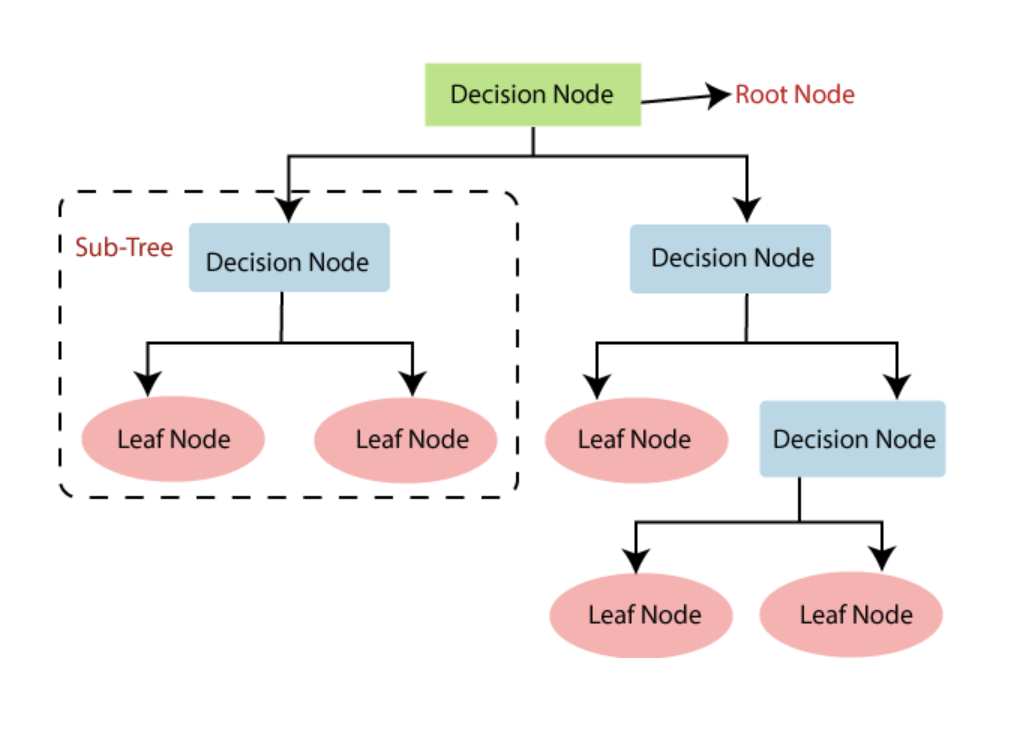

In [7]:
X_train['Pclass']

,Pclass
730,2
390,3
118,3
440,2
309,1
...,...
106,3
270,2
860,2
435,1


[Text(0.5555555555555556, 0.875, 'Pclass <= 2.5\ngini = 0.475\nsamples = 709\nvalue = [434.0, 275.0]'),
 Text(0.3333333333333333, 0.625, 'Fare <= 52.277\ngini = 0.49\nsamples = 315\nvalue = [135, 180]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'Age <= 15.0\ngini = 0.498\nsamples = 200\nvalue = [106, 94]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.489\nsamples = 185\nvalue = [106, 79]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.377\nsamples = 115\nvalue = [29, 86]'),
 Text(0.7777777777777778, 0.625, 'Age <= 33.5\ngini = 0.366\nsamples = 394\nvalue = [299, 95]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'Siblings_SpousesAboard <= 2.5\ngini = 0.403\nsamples = 314\nvalue = [226.0, 88.0]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.426\nsamples = 279\nvalue = [193, 86]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.108\nsamples = 35\nvalu

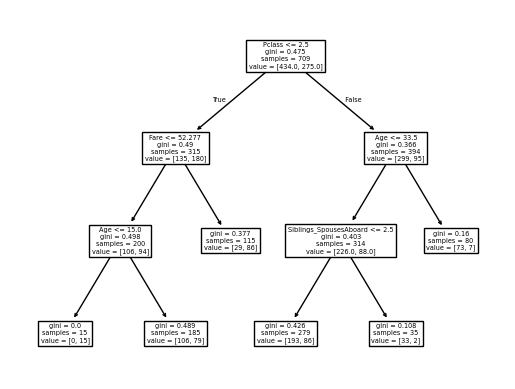

In [42]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=6)
model.fit(X_train, y_train)
tree.plot_tree(model, feature_names=X_train.columns)

              precision    recall  f1-score   support

           0       0.68      0.94      0.78       111
           1       0.71      0.25      0.37        67

    accuracy                           0.68       178
   macro avg       0.69      0.60      0.58       178
weighted avg       0.69      0.68      0.63       178



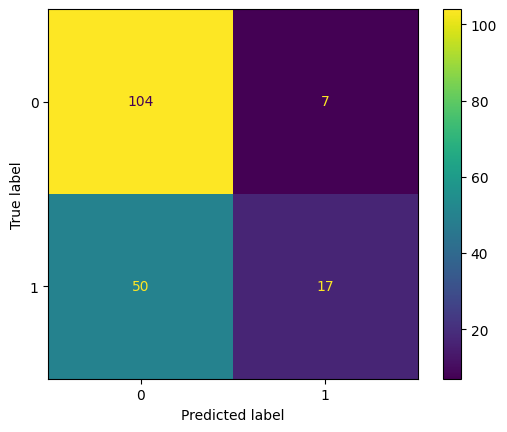

In [43]:
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_predict))


In [19]:
# prepare cross validation dataset
Xc_train, Xc_val, yc_train, yc_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

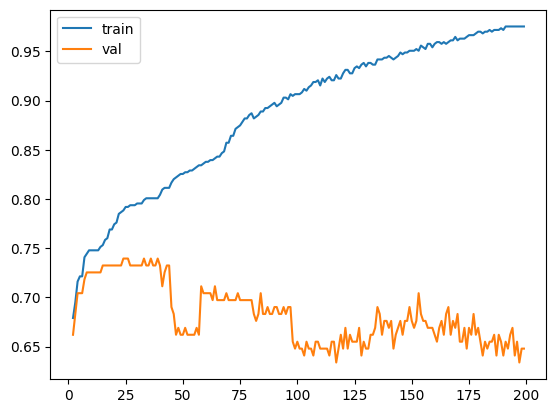

In [23]:
# train
acc_train = []
acc_val = []
max_node = 200

for nd in range(2, max_node):
  model = tree.DecisionTreeClassifier(max_leaf_nodes=nd)
  model.fit(Xc_train, yc_train)

  # calculate train accuracy
  yc_pred_train = model.predict(Xc_train)
  acc_train.append(accuracy_score(yc_train, yc_pred_train))

  # calculate val accuracy
  yc_pred_val = model.predict(Xc_val)
  acc_val.append(accuracy_score(yc_val, yc_pred_val))


fig = plt.figure()
ax = plt.axes()

ax.plot(range(2, max_node), acc_train, label='train')
ax.plot(range(2, max_node), acc_val, label='val')

ax.legend()


100%|██████████| 50/50 [01:16<00:00,  1.53s/it]


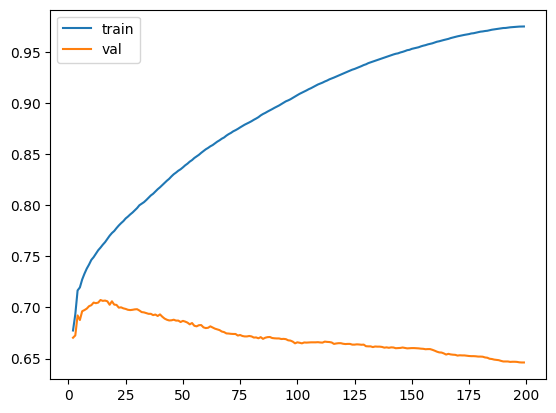

In [44]:
# repeat cross validation 50 or 100 times to get smoother results
repeat = 50
max_node = 200
acc_train = []
acc_val = []


for i in tqdm(range(1, repeat+1)):
  Xc_train, Xc_val, yc_train, yc_val = train_test_split(X_train, y_train, test_size=0.2)
  for nd in range(2, max_node):
    model = tree.DecisionTreeClassifier(max_leaf_nodes=nd, random_state=48)
    model.fit(Xc_train, yc_train)

    # calculate train accuracy
    yc_pred_train = model.predict(Xc_train)
    cur_acc_train = accuracy_score(yc_train, yc_pred_train)
    if len(acc_train) == len(range(2, max_node)):
      acc_train[nd-2] = (acc_train[nd-2]*(i-1) + cur_acc_train) / i
    else:
      acc_train.append(cur_acc_train)

    # calculate val accuracy
    yc_pred_val = model.predict(Xc_val)
    cur_acc_val = accuracy_score(yc_val, yc_pred_val)
    if len(acc_val) == len(range(2, max_node)):
      acc_val[nd-2] = (acc_val[nd-2]*(i-1) + cur_acc_val) / i
    else:
      acc_val.append(cur_acc_val)


fig = plt.figure()
ax = plt.axes()

ax.plot(range(2, max_node), acc_train, label='train')
ax.plot(range(2, max_node), acc_val, label='val')

ax.legend()


optimal max_leaf_nodes 14 with average accuracy 0.7073239436619718
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       434
           1       0.83      0.44      0.58       275

    accuracy                           0.75       709
   macro avg       0.78      0.69      0.70       709
weighted avg       0.77      0.75      0.73       709

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       111
           1       0.71      0.33      0.45        67

    accuracy                           0.70       178
   macro avg       0.70      0.62      0.62       178
weighted avg       0.70      0.70      0.66       178



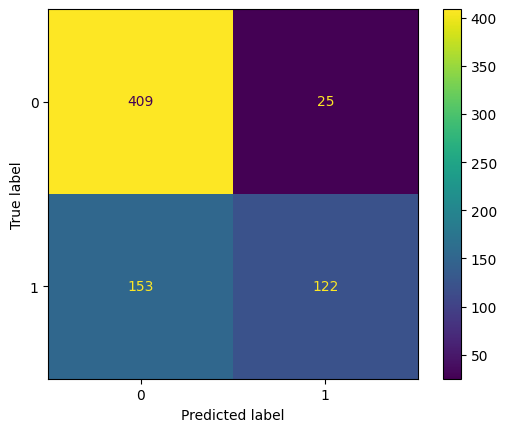

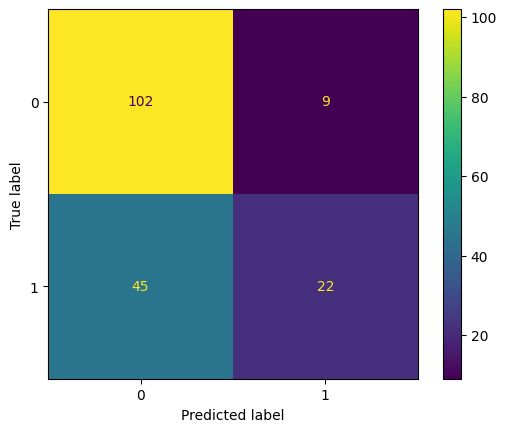

In [46]:
max_acc = max(acc_val)
optimal_node = list(range(2, max_node))[acc_val.index(max_acc)]
print(f"optimal max_leaf_nodes {optimal_node} with average accuracy {max_acc}")

model = tree.DecisionTreeClassifier(max_leaf_nodes=optimal_node, random_state=48)
model.fit(X_train, y_train)

y_predict = model.predict(X_train)
cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_train, y_predict))


y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_predict))